In [81]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [82]:
plt.rcParams['figure.figsize']=(5.0,4.0)
##plt.rcParams['image.cmap']='Grey'

In [83]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)


In [84]:
mnist=input_data.read_data_sets('MNIST data/',one_hot=True)

Extracting MNIST data/train-images-idx3-ubyte.gz
Extracting MNIST data/train-labels-idx1-ubyte.gz
Extracting MNIST data/t10k-images-idx3-ubyte.gz
Extracting MNIST data/t10k-labels-idx1-ubyte.gz


In [85]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [86]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


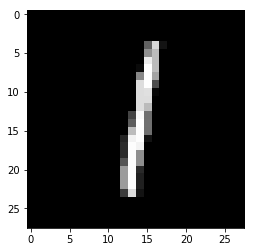

In [99]:

example_image = mnist.train.images[1]
example_image_reshaped = example_image.reshape((28, 28))# Can't render a line of 784 numbers
example_label = mnist.train.labels[1]

print(example_label)
plt.imshow(example_image_reshaped,cmap='gray')

In [105]:
x=tf.placeholder(tf.float32,[None,784])
y_=tf.placeholder(tf.float32,[None,10])

In [106]:
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y=tf.nn.softmax(tf.matmul(x,W)+b)

In [107]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [108]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [109]:
for i in range(1000):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

In [110]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9186
